In [2]:
import nurbs
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [3]:
def create_knots_vector(u_min=0, u_max=1, degree=2, num_poles=4, endpoint=0):
    return np.array([u_min] * (degree + 1 - endpoint) + 
                     list(np.linspace(u_min, u_max, num_poles - degree + 1 + endpoint * 2)[1:-1]) +
                     [u_max] * (degree + 1 - endpoint))

In [4]:
num_poles = 10
degree=3
knots = create_knots_vector(u_max=1, num_poles=num_poles, degree=degree, endpoint=0)
# knots = [0, 0, 0., 0.5, 1, 1, 1]
assert(num_poles > degree)
assert(len(knots) == num_poles + degree + 1)
n = nurbs.NurbsBase1D(knots, np.array([1.] * num_poles), degree)

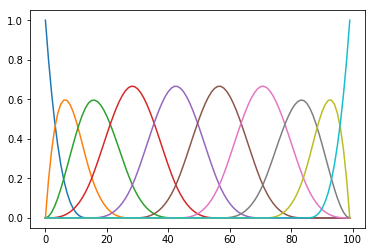

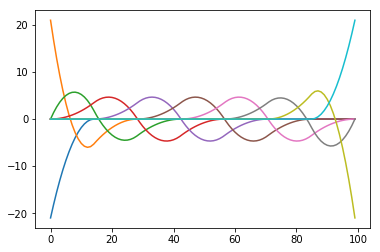

In [5]:
plt.plot(n.getInfluenceMatrix(np.linspace(0, 1, 100)).toarray())
plt.show()
n.computeFirstDerivatives()
plt.plot(n.getDuMatrix(np.linspace(0, 1, 100)).toarray())
plt.show()

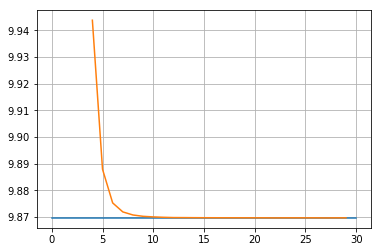

In [8]:
eig_values = []
for num_poles in range(4, 30):
    int_points = 500
    degree=2
    knots = create_knots_vector(u_max=1, num_poles=num_poles, degree=degree, endpoint=0)
    # knots = [0, 0, 0., 0.5, 1, 1, 1]
    assert(num_poles > degree)
    assert(len(knots) == num_poles + degree + 1)
    n = nurbs.NurbsBase1D(knots, np.array([1.] * num_poles), degree)

    boarder = 1. / int_points / 2.
    x1 = np.linspace(boarder, 1 - boarder, int_points)

    n.computeFirstDerivatives()
    mat = n.getInfluenceMatrix(x1)
    mat_d = n.getDuMatrix(x1)

    # solve diff
    # d^2phi/dt^2 = d^2phi/dx^2
    M = mat.T @ mat
    K = mat_d.T @ mat_d

    eig_val, eig_vec = scipy.sparse.linalg.eigsh(K, k=3, M=M, which="SM")
    eig_values.append([num_poles, eig_val[1]])
plt.plot([0, 30], [np.pi**2, np.pi**2])
plt.plot(*np.array(eig_values).T)
plt.grid()
plt.show()


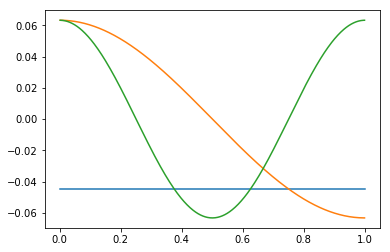

In [9]:
plt.plot(x1, (mat@eig_vec))
plt.show()